<a href="https://colab.research.google.com/github/Iswaqasahmed/Data-Analysis/blob/main/Day%204/tedtalk_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import  numpy as np
import matplotlib.pyplot as plt

In [13]:
%matplotlib inline

In [3]:
from google.colab import files
data = files.upload()

Saving ted.csv to ted.csv


In [9]:
url = "https://raw.githubusercontent.com/justmarkham/pycon-2019-tutorial/master/ted.csv"
df = pd.read_csv(url)

In [10]:
df.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


In [15]:
df.shape

(2550, 17)

In [17]:
df.dtypes  # object means: string + arbitary python object (list , dictionary etc)

comments               int64
description           object
duration               int64
event                 object
film_date              int64
languages              int64
main_speaker          object
name                  object
num_speaker            int64
published_date         int64
ratings               object
related_talks         object
speaker_occupation    object
tags                  object
title                 object
url                   object
views                  int64
dtype: object

In [18]:
df.isnull().sum()

comments              0
description           0
duration              0
event                 0
film_date             0
languages             0
main_speaker          0
name                  0
num_speaker           0
published_date        0
ratings               0
related_talks         0
speaker_occupation    6
tags                  0
title                 0
url                   0
views                 0
dtype: int64

## Which Talk provoke the most online discussion

In [20]:
df.sort_values('comments').tail()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
1787,2673,Our consciousness is a fundamental aspect of o...,1117,TED2014,1395100800,33,David Chalmers,David Chalmers: How do you explain consciousness?,1,1405350484,"[{'id': 25, 'name': 'OK', 'count': 280}, {'id'...","[{'id': 1308, 'hero': 'https://pe.tedcdn.com/i...",Philosopher,"['brain', 'consciousness', 'neuroscience', 'ph...",How do you explain consciousness?,https://www.ted.com/talks/david_chalmers_how_d...,2162764
201,2877,Jill Bolte Taylor got a research opportunity f...,1099,TED2008,1204070400,49,Jill Bolte Taylor,Jill Bolte Taylor: My stroke of insight,1,1205284200,"[{'id': 22, 'name': 'Fascinating', 'count': 14...","[{'id': 184, 'hero': 'https://pe.tedcdn.com/im...",Neuroanatomist,"['biology', 'brain', 'consciousness', 'global ...",My stroke of insight,https://www.ted.com/talks/jill_bolte_taylor_s_...,21190883
644,3356,"Questions of good and evil, right and wrong ar...",1386,TED2010,1265846400,39,Sam Harris,Sam Harris: Science can answer moral questions,1,1269249180,"[{'id': 8, 'name': 'Informative', 'count': 923...","[{'id': 666, 'hero': 'https://pe.tedcdn.com/im...","Neuroscientist, philosopher","['culture', 'evolutionary psychology', 'global...",Science can answer moral questions,https://www.ted.com/talks/sam_harris_science_c...,3433437
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
96,6404,Richard Dawkins urges all atheists to openly s...,1750,TED2002,1012608000,42,Richard Dawkins,Richard Dawkins: Militant atheism,1,1176689220,"[{'id': 3, 'name': 'Courageous', 'count': 3236...","[{'id': 86, 'hero': 'https://pe.tedcdn.com/ima...",Evolutionary biologist,"['God', 'atheism', 'culture', 'religion', 'sci...",Militant atheism,https://www.ted.com/talks/richard_dawkins_on_m...,4374792


In [21]:
df['comment_per_view'] = df.comments / df.views

In [22]:
df.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,comment_per_view
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,0.000096
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520,0.000083
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292,0.000076
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550,0.000118
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869,0.000049


In [25]:
df.sort_values('comment_per_view').tail()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,comment_per_view
954,2492,Janet Echelman found her true voice as an arti...,566,TED2011,1299110400,35,Janet Echelman,Janet Echelman: Taking imagination seriously,1,1307489760,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 3...","[{'id': 453, 'hero': 'https://pe.tedcdn.com/im...",Artist,"['art', 'cities', 'culture', 'data', 'design',...",Taking imagination seriously,https://www.ted.com/talks/janet_echelman,1832930,0.001360
694,1502,Filmmaker Sharmeen Obaid-Chinoy takes on a ter...,489,TED2010,1265760000,32,Sharmeen Obaid-Chinoy,Sharmeen Obaid-Chinoy: Inside a school for sui...,1,1274865960,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 3...","[{'id': 171, 'hero': 'https://pe.tedcdn.com/im...",Filmmaker,"['TED Fellows', 'children', 'culture', 'film',...",Inside a school for suicide bombers,https://www.ted.com/talks/sharmeen_obaid_chino...,1057238,0.001421
96,6404,Richard Dawkins urges all atheists to openly s...,1750,TED2002,1012608000,42,Richard Dawkins,Richard Dawkins: Militant atheism,1,1176689220,"[{'id': 3, 'name': 'Courageous', 'count': 3236...","[{'id': 86, 'hero': 'https://pe.tedcdn.com/ima...",Evolutionary biologist,"['God', 'atheism', 'culture', 'religion', 'sci...",Militant atheism,https://www.ted.com/talks/richard_dawkins_on_m...,4374792,0.001464
803,834,David Bismark demos a new system for voting th...,422,TEDGlobal 2010,1279065600,36,David Bismark,David Bismark: E-voting without fraud,1,1288685640,"[{'id': 25, 'name': 'OK', 'count': 111}, {'id'...","[{'id': 803, 'hero': 'https://pe.tedcdn.com/im...",Voting system designer,"['culture', 'democracy', 'design', 'global iss...",E-voting without fraud,https://www.ted.com/talks/david_bismark_e_voti...,543551,0.001534
744,649,Hours before New York lawmakers rejected a key...,453,New York State Senate,1259712000,0,Diane J. Savino,Diane J. Savino: The case for same-sex marriage,1,1282062180,"[{'id': 25, 'name': 'OK', 'count': 100}, {'id'...","[{'id': 217, 'hero': 'https://pe.tedcdn.com/im...",Senator,"['God', 'LGBT', 'culture', 'government', 'law'...",The case for same-sex marriage,https://www.ted.com/talks/diane_j_savino_the_c...,292395,0.002220


In [26]:
df['view_per_comment'] = df.views / df.comments

In [28]:
df.sort_values('view_per_comment').head()       # view per comment mean, exp : 450 people views and only one comment on it.

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,comment_per_view,view_per_comment
744,649,Hours before New York lawmakers rejected a key...,453,New York State Senate,1259712000,0,Diane J. Savino,Diane J. Savino: The case for same-sex marriage,1,1282062180,"[{'id': 25, 'name': 'OK', 'count': 100}, {'id'...","[{'id': 217, 'hero': 'https://pe.tedcdn.com/im...",Senator,"['God', 'LGBT', 'culture', 'government', 'law'...",The case for same-sex marriage,https://www.ted.com/talks/diane_j_savino_the_c...,292395,0.002220,450.531587
803,834,David Bismark demos a new system for voting th...,422,TEDGlobal 2010,1279065600,36,David Bismark,David Bismark: E-voting without fraud,1,1288685640,"[{'id': 25, 'name': 'OK', 'count': 111}, {'id'...","[{'id': 803, 'hero': 'https://pe.tedcdn.com/im...",Voting system designer,"['culture', 'democracy', 'design', 'global iss...",E-voting without fraud,https://www.ted.com/talks/david_bismark_e_voti...,543551,0.001534,651.739808
96,6404,Richard Dawkins urges all atheists to openly s...,1750,TED2002,1012608000,42,Richard Dawkins,Richard Dawkins: Militant atheism,1,1176689220,"[{'id': 3, 'name': 'Courageous', 'count': 3236...","[{'id': 86, 'hero': 'https://pe.tedcdn.com/ima...",Evolutionary biologist,"['God', 'atheism', 'culture', 'religion', 'sci...",Militant atheism,https://www.ted.com/talks/richard_dawkins_on_m...,4374792,0.001464,683.134291
694,1502,Filmmaker Sharmeen Obaid-Chinoy takes on a ter...,489,TED2010,1265760000,32,Sharmeen Obaid-Chinoy,Sharmeen Obaid-Chinoy: Inside a school for sui...,1,1274865960,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 3...","[{'id': 171, 'hero': 'https://pe.tedcdn.com/im...",Filmmaker,"['TED Fellows', 'children', 'culture', 'film',...",Inside a school for suicide bombers,https://www.ted.com/talks/sharmeen_obaid_chino...,1057238,0.001421,703.886818
954,2492,Janet Echelman found her true voice as an arti...,566,TED2011,1299110400,35,Janet Echelman,Janet Echelman: Taking imagination seriously,1,1307489760,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 3...","[{'id': 453, 'hero': 'https://pe.tedcdn.com/im...",Artist,"['art', 'cities', 'culture', 'data', 'design',...",Taking imagination seriously,https://www.ted.com/talks/janet_echelman,1832930,0.001360,735.525682


### visulaization the distribution of comments

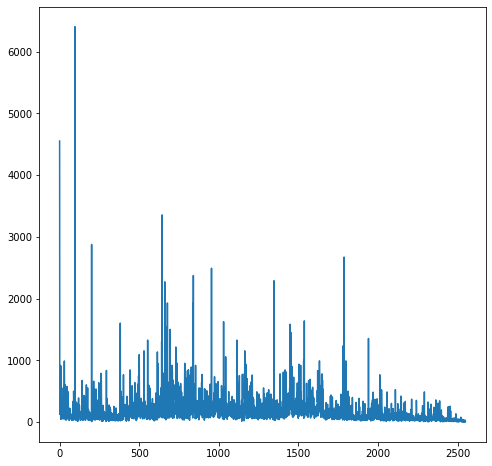

In [33]:
df.comments.plot(figsize=(8,8))   # line plot + small talk many comment and lot talk small comment

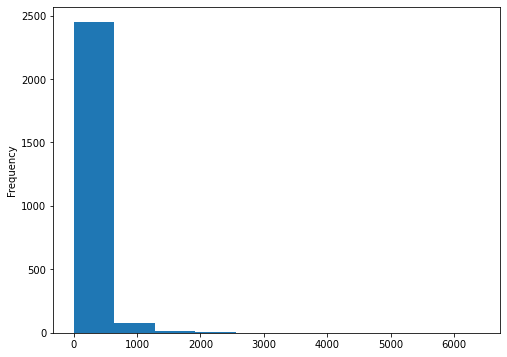

In [35]:
df.comments.plot(kind='hist',figsize=(8,6))   # line plot + small talk many comment and lot talk small comment

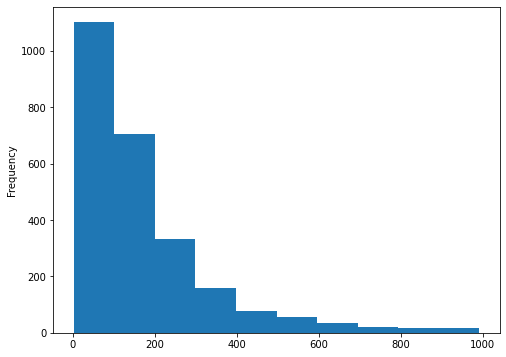

In [36]:
# problem with above bar char with most of our data are left side
df[df.comments < 1000].comments.plot(kind='hist',figsize=(8,6))   # line plot + small talk many comment and lot talk small comment

In [39]:
df[df.comments >= 1000 ].shape # we only lose 32 talks

(32, 19)

# Another way to plot 

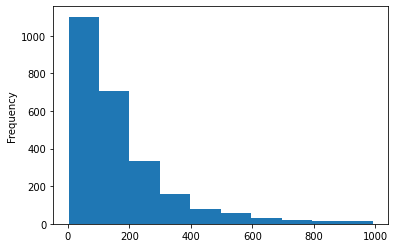

In [41]:
df.query('comments < 1000').comments.plot(kind = 'hist')

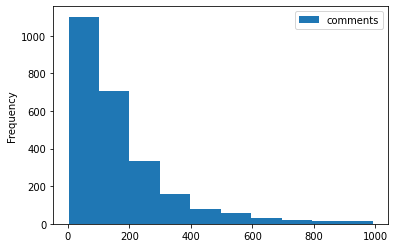

In [45]:
df.loc[df.comments < 1000,['comments']].plot(kind = 'hist')

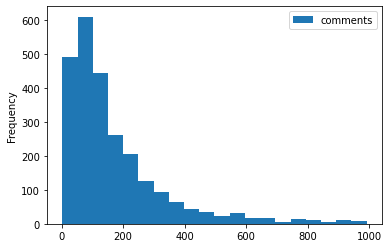

In [47]:
df.loc[df.comments < 1000,['comments']].plot(kind = 'hist',bins = 20)

## plot the number of the talk that took place each year

In [50]:
df.event.sample(15)   # random sample for randomly selected

649     Michael Howard Studios
2234                   TED2016
955                    TED2011
2272                 TEDSummit
114                    TED2005
698                    TED2010
1796                TEDxSydney
2411          TEDxBeaconStreet
1650               TEDMED 2013
815             TEDGlobal 2010
1885            TEDxNorrkoping
149                    TED2007
2127          TEDGlobal>Geneva
1432          TEDxThessaloniki
273                    TED2008
Name: event, dtype: object

In [52]:
df.film_date.head()   # unix timestamp

0    1140825600
1    1140825600
2    1140739200
3    1140912000
4    1140566400
Name: film_date, dtype: int64

In [53]:
# using pandas data timestamp 
pd.to_datetime(df.film_date)

0      1970-01-01 00:00:01.140825600
1      1970-01-01 00:00:01.140825600
2      1970-01-01 00:00:01.140739200
3      1970-01-01 00:00:01.140912000
4      1970-01-01 00:00:01.140566400
                    ...             
2545   1970-01-01 00:00:01.496707200
2546   1970-01-01 00:00:01.492992000
2547   1970-01-01 00:00:01.492992000
2548   1970-01-01 00:00:01.499472000
2549   1970-01-01 00:00:01.492992000
Name: film_date, Length: 2550, dtype: datetime64[ns]

In [55]:
# using pandas data timestamp 
df['file_datetime'] = pd.to_datetime(df.film_date,unit = 's')

In [56]:
df[['event','file_datetime']]

,event,file_datetime
0,TED2006,2006-02-25
1,TED2006,2006-02-25
2,TED2006,2006-02-24
3,TED2006,2006-02-26
4,TED2006,2006-02-22
...,...,...
2545,TED2017,2017-06-06
2546,TED2017,2017-04-24
2547,TED2017,2017-04-24
2548,TEDxMileHigh,2017-07-08


In [60]:
df.dtypes

comments                       int64
description                   object
duration                       int64
event                         object
film_date                      int64
languages                      int64
main_speaker                  object
name                          object
num_speaker                    int64
published_date                 int64
ratings                       object
related_talks                 object
speaker_occupation            object
tags                          object
title                         object
url                           object
views                          int64
comment_per_view             float64
view_per_comment             float64
file_datetime         datetime64[ns]
dtype: object

In [62]:
df.file_datetime.dt.year

0       2006
1       2006
2       2006
3       2006
4       2006
        ... 
2545    2017
2546    2017
2547    2017
2548    2017
2549    2017
Name: file_datetime, Length: 2550, dtype: int64

In [63]:
df.file_datetime.dt.day

0       25
1       25
2       24
3       26
4       22
        ..
2545     6
2546    24
2547    24
2548     8
2549    24
Name: file_datetime, Length: 2550, dtype: int64

In [64]:
df.file_datetime.dt.year.value_counts()

2013    270
2011    270
2010    267
2012    267
2016    246
2015    239
2014    237
2009    232
2007    114
2017     98
2008     84
2005     66
2006     50
2003     33
2004     33
2002     27
1998      6
2001      5
1983      1
1991      1
1994      1
1990      1
1984      1
1972      1
Name: file_datetime, dtype: int64

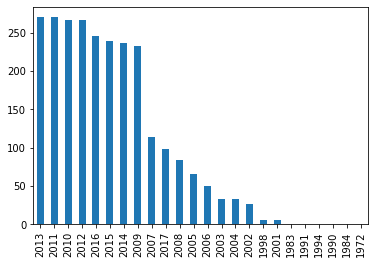

In [65]:
df.file_datetime.dt.year.value_counts().plot(kind='bar') # bar chat isn't valid here because some of year that have not data also showed

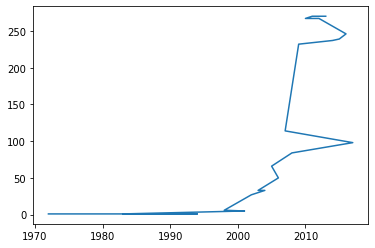

In [66]:
df.file_datetime.dt.year.value_counts().plot()   # problem with this chart is its joing x - axis with values 

In [69]:
df.file_datetime.dt.year.value_counts().sort_index()

1972      1
1983      1
1984      1
1990      1
1991      1
1994      1
1998      6
2001      5
2002     27
2003     33
2004     33
2005     66
2006     50
2007    114
2008     84
2009    232
2010    267
2011    270
2012    267
2013    270
2014    237
2015    239
2016    246
2017     98
Name: file_datetime, dtype: int64

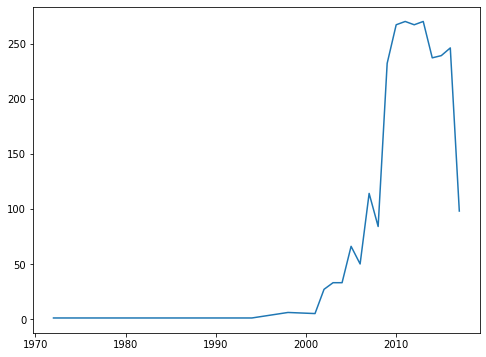

In [71]:
df.file_datetime.dt.year.value_counts().sort_index().plot(figsize=(8,6))

In [72]:
# why we  se some drop because after maxium date 2015 we don't have enought data
df.file_datetime.max()

Timestamp('2017-08-27 00:00:00')

## what was the best event TED history to attend?

In [73]:
  df.event.value_counts()

TED2014                    84
TED2009                    83
TED2013                    77
TED2016                    77
TED2015                    75
                           ..
Skoll World Forum 2007      1
TED@State Street London     1
TEDxDubai                   1
TEDxPennQuarter             1
BBC TV                      1
Name: event, Length: 355, dtype: int64

In [74]:
df.groupby('event').views.mean().head()

event
AORN Congress                  149818.0
Arbejdsglaede Live             971594.0
BBC TV                         521974.0
Bowery Poetry Club             676741.0
Business Innovation Factory    304086.0
Name: views, dtype: float64

In [77]:
df.groupby('event').views.mean().sort_values().tail()

event
TEDxNorrkoping        6569493.0
TEDxCreativeCoast     8444981.0
TEDxBloomington       9484259.5
TEDxHouston          16140250.5
TEDxPuget Sound      34309432.0
Name: views, dtype: float64

In [78]:
df.groupby('event').views.agg(['count','mean']).sort_values('mean').tail()

,count,mean
event,,
TEDxNorrkoping,1,6569493.0
TEDxCreativeCoast,1,8444981.0
TEDxBloomington,2,9484259.5
TEDxHouston,2,16140250.5
TEDxPuget Sound,1,34309432.0


In [79]:
df.groupby('event').views.agg(['count','mean','sum']).sort_values('mean').tail()

,count,mean,sum
event,,,
TEDxNorrkoping,1,6569493.0,6569493
TEDxCreativeCoast,1,8444981.0,8444981
TEDxBloomington,2,9484259.5,18968519
TEDxHouston,2,16140250.5,32280501
TEDxPuget Sound,1,34309432.0,34309432


## Unpack the rating


In [80]:
df.ratings.head()

0    [{'id': 7, 'name': 'Funny', 'count': 19645}, {...
1    [{'id': 7, 'name': 'Funny', 'count': 544}, {'i...
2    [{'id': 7, 'name': 'Funny', 'count': 964}, {'i...
3    [{'id': 3, 'name': 'Courageous', 'count': 760}...
4    [{'id': 9, 'name': 'Ingenious', 'count': 3202}...
Name: ratings, dtype: object

In [84]:
df.ratings[0] # is not list of disctionary, stringfy list of distionary called also string

"[{'id': 7, 'name': 'Funny', 'count': 19645}, {'id': 1, 'name': 'Beautiful', 'count': 4573}, {'id': 9, 'name': 'Ingenious', 'count': 6073}, {'id': 3, 'name': 'Courageous', 'count': 3253}, {'id': 11, 'name': 'Longwinded', 'count': 387}, {'id': 2, 'name': 'Confusing', 'count': 242}, {'id': 8, 'name': 'Informative', 'count': 7346}, {'id': 22, 'name': 'Fascinating', 'count': 10581}, {'id': 21, 'name': 'Unconvincing', 'count': 300}, {'id': 24, 'name': 'Persuasive', 'count': 10704}, {'id': 23, 'name': 'Jaw-dropping', 'count': 4439}, {'id': 25, 'name': 'OK', 'count': 1174}, {'id': 26, 'name': 'Obnoxious', 'count': 209}, {'id': 10, 'name': 'Inspiring', 'count': 24924}]"

In [85]:
type(df.ratings[0])

str

In [86]:
import ast            # abtract sntax tree

In [88]:
ast.literal_eval('[1,2,3]')  # ast.literal_eval return string list to list

[1, 2, 3]

In [89]:
type(ast.literal_eval('[1,2,3]'))

list

In [90]:
ast.literal_eval(df.ratings[0])

[{'count': 19645, 'id': 7, 'name': 'Funny'},
 {'count': 4573, 'id': 1, 'name': 'Beautiful'},
 {'count': 6073, 'id': 9, 'name': 'Ingenious'},
 {'count': 3253, 'id': 3, 'name': 'Courageous'},
 {'count': 387, 'id': 11, 'name': 'Longwinded'},
 {'count': 242, 'id': 2, 'name': 'Confusing'},
 {'count': 7346, 'id': 8, 'name': 'Informative'},
 {'count': 10581, 'id': 22, 'name': 'Fascinating'},
 {'count': 300, 'id': 21, 'name': 'Unconvincing'},
 {'count': 10704, 'id': 24, 'name': 'Persuasive'},
 {'count': 4439, 'id': 23, 'name': 'Jaw-dropping'},
 {'count': 1174, 'id': 25, 'name': 'OK'},
 {'count': 209, 'id': 26, 'name': 'Obnoxious'},
 {'count': 24924, 'id': 10, 'name': 'Inspiring'}]

In [91]:
def str_to_lis(rating_str):
  return ast.literal_eval(rating_str)

In [92]:
str_to_lis(df.ratings[0])

[{'count': 19645, 'id': 7, 'name': 'Funny'},
 {'count': 4573, 'id': 1, 'name': 'Beautiful'},
 {'count': 6073, 'id': 9, 'name': 'Ingenious'},
 {'count': 3253, 'id': 3, 'name': 'Courageous'},
 {'count': 387, 'id': 11, 'name': 'Longwinded'},
 {'count': 242, 'id': 2, 'name': 'Confusing'},
 {'count': 7346, 'id': 8, 'name': 'Informative'},
 {'count': 10581, 'id': 22, 'name': 'Fascinating'},
 {'count': 300, 'id': 21, 'name': 'Unconvincing'},
 {'count': 10704, 'id': 24, 'name': 'Persuasive'},
 {'count': 4439, 'id': 23, 'name': 'Jaw-dropping'},
 {'count': 1174, 'id': 25, 'name': 'OK'},
 {'count': 209, 'id': 26, 'name': 'Obnoxious'},
 {'count': 24924, 'id': 10, 'name': 'Inspiring'}]

In [94]:
df.ratings.apply(str_to_lis).head()

0    [{'id': 7, 'name': 'Funny', 'count': 19645}, {...
1    [{'id': 7, 'name': 'Funny', 'count': 544}, {'i...
2    [{'id': 7, 'name': 'Funny', 'count': 964}, {'i...
3    [{'id': 3, 'name': 'Courageous', 'count': 760}...
4    [{'id': 9, 'name': 'Ingenious', 'count': 3202}...
Name: ratings, dtype: object

In [95]:
df.ratings.apply(ast.literal_eval).head()

0    [{'id': 7, 'name': 'Funny', 'count': 19645}, {...
1    [{'id': 7, 'name': 'Funny', 'count': 544}, {'i...
2    [{'id': 7, 'name': 'Funny', 'count': 964}, {'i...
3    [{'id': 3, 'name': 'Courageous', 'count': 760}...
4    [{'id': 9, 'name': 'Ingenious', 'count': 3202}...
Name: ratings, dtype: object

In [97]:
df['rating_list'] = df.ratings.apply(lambda x : ast.literal_eval)  

In [100]:
df.dtypes

comments                       int64
description                   object
duration                       int64
event                         object
film_date                      int64
languages                      int64
main_speaker                  object
name                          object
num_speaker                    int64
published_date                 int64
ratings                       object
related_talks                 object
speaker_occupation            object
tags                          object
title                         object
url                           object
views                          int64
comment_per_view             float64
view_per_comment             float64
file_datetime         datetime64[ns]
rating_list                   object
dtype: object